In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter 

In [5]:
nfl = pd.read_csv('~/Desktop/nfl_draft.csv')
nfl.shape

(8435, 33)

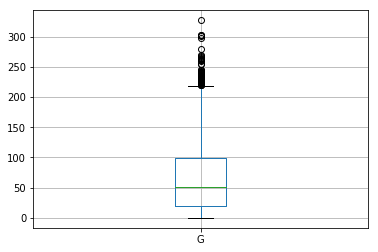

In [7]:

nfl.boxplot(column='G');

In [8]:
nfl_rusher_rnd = nfl[~nfl.Rush_Yds.isnull()]#['Rnd', 'Standard Position']

In [9]:
nfl_rusher_rnd['Ave_Yards_G'] = nfl_rusher_rnd.Rush_Yds / nfl_rusher_rnd.G

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
nfl_rusher_rnd.head(20)

,Player_Id,Year,Rnd,Pick,Tm,Player,Pos,Position Standard,First4AV,Age,...,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ,Unnamed: 32,Ave_Yards_G
0,WinsJa00,2015,1.0,1,TAM,Jameis Winston,QB,QB,13,21.0,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Florida St.,NaN,11.961538
1,MariMa01,2015,1.0,2,TEN,Marcus Mariota,QB,QB,9,21.0,...,4.0,1.0,41.0,1.0,NaN,NaN,NaN,Oregon,NaN,22.434783
3,CoopAm00,2015,1.0,4,OAK,Amari Cooper,WR,WR,9,21.0,...,0.0,134.0,1970.0,9.0,NaN,NaN,NaN,Alabama,NaN,-0.115385
6,WhitKe00,2015,1.0,7,CHI,Kevin White,WR,WR,0,23.0,...,0.0,19.0,187.0,0.0,NaN,NaN,NaN,West Virginia,NaN,2.250000
9,GurlTo01,2015,1.0,10,STL,Todd Gurley,RB,RB,8,21.0,...,14.0,47.0,390.0,0.0,NaN,NaN,NaN,Georgia,NaN,73.782609
14,GordMe00,2015,1.0,15,SDG,Melvin Gordon,RB,RB,5,22.0,...,9.0,66.0,538.0,2.0,NaN,NaN,NaN,Wisconsin,NaN,61.625000
19,AghoNe00,2015,1.0,20,PHI,Nelson Agholor,WR,WR,2,22.0,...,0.0,50.0,547.0,2.0,NaN,NaN,NaN,USC,NaN,0.217391
25,PerrBr02,2015,1.0,26,BAL,Breshad Perriman,WR,WR,0,22.0,...,0.0,20.0,280.0,1.0,NaN,NaN,NaN,Central Florida,NaN,0.200000
28,DorsPh00,2015,1.0,29,IND,Phillip Dorsett,WR,WR,2,22.0,...,0.0,42.0,620.0,2.0,NaN,NaN,NaN,Miami (FL),NaN,0.952381
35,YeldT.00,2015,2.0,36,JAX,T.J. Yeldon,RB,RB,0,21.0,...,3.0,70.0,496.0,2.0,NaN,NaN,NaN,Alabama,NaN,47.318182


In [11]:
nfl_stats = Counter(nfl['Tm'])

In [12]:
nfl_pos_count = Counter(nfl['Position Standard'])

In [13]:
nfl_pos = nfl['Position Standard']

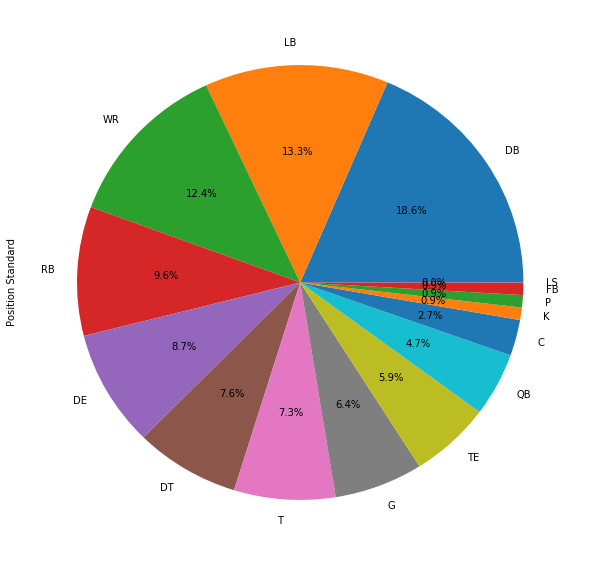

In [14]:
#plt.bar(nfl_pos, )
plt.figure(figsize=(10, 10));
nfl_positions = nfl['Position Standard'].value_counts()#.plot(kind='pie');
nfl_positions.plot(kind='pie', autopct='%1.1f%%');

#((nfl_positions / nfl_positions.sum()).plot(kind='pie');
# plt.xlabel('NFL Position');
# plt.ylabel('# of players drafted at position');
# plt.title('# of Players Drafted per Position 1985 - 2015');


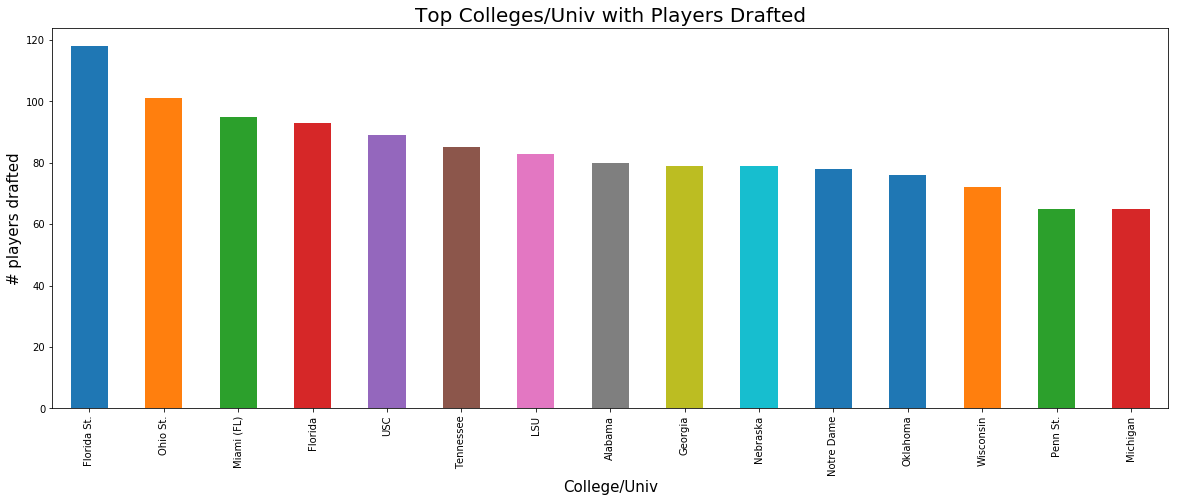

In [18]:
plt.figure(figsize=(20, 7))
nfl[nfl.Rnd <= 6]['College/Univ'].value_counts()[:15].plot(kind='bar');

plt.xlabel('College/Univ', size=15);
plt.ylabel('# players drafted', size=15)
plt.title('Top Colleges/Univ with Players Drafted', size=20);

In [3]:
nfl.loc[nfl['PB']>0,['Player','Year']].groupby(['Year']).count().plot(kind='bar')
plt.xlabel('Draft Year')
plt.ylabel('# of players selected for pro bowl')
plt.title('Best draft class based on pro bowl selection');

NameError: name 'nfl' is not defined

In [205]:
draft_class = nfl.loc[nfl['PB']>0,['Player','Year']].groupby(['Year']).count() / nfl[['Player','Year']].groupby(['Year']).count()
draft_class.sort_values('Player', ascending = False, inplace=True)


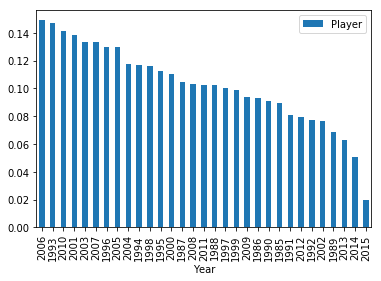

In [210]:
draft_class.plot(kind='bar');

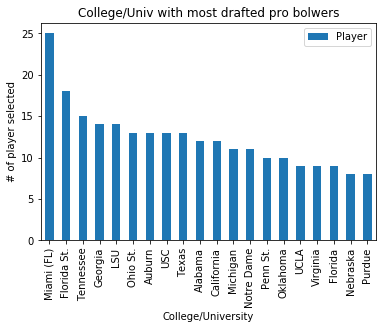

In [201]:
nfl.loc[nfl['PB']>0,['Player','College/Univ']].groupby(['College/Univ']).count().sort_values('Player', ascending=False)[:20].plot(kind='bar')
plt.xlabel('College/University');
plt.ylabel('# of player selected');
plt.title('College/Univ with most drafted pro bolwers');



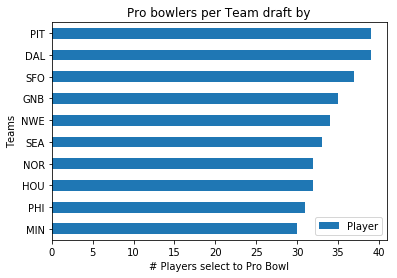

In [238]:
#plt.figure(figsize=(20, 7));
nfl.loc[nfl['PB']>0,['Player','Tm']].groupby(['Tm']).count().sort_values('Player', ascending=True)[25:].plot(kind="barh")
plt.xlabel("# Players select to Pro Bowl");
plt.ylabel('Teams');
plt.title('Pro bowlers per Team draft by');

In [ ]:
nfl.loc[nfl['Players']]